In [1]:
import sys
sys.path.append("../lfit_gui/")
import lens_funcs_gui as lf
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt

In [2]:
obj="J0746"

In [3]:
def ReadResult(band):

    hdul = fits.open('./results/'+obj+'-'+band+'_fit_PSFs_one_sersic.fits')
    dof=hdul[0].header['DOF']
    chi2=hdul[0].header['CHI2']
    ppar=(hdul[3].data).p_phot
    data=hdul[4].data
    model=hdul[6].data
    hdul.close()
    
    return dof,chi2,ppar,data,model

In [4]:
# def ReadPSF(band):
#     hdul = fits.open('./results/'+obj+'-'+band+'_fit_star.fits')
#     PSF=hdul[4].data
#     hdul.close()

#     PSF=PSF/PSF.sum()
    
#     return PSF
def ReadPSF(band):

    PSF=np.load('./results/'+obj+'-'+band+'PSF.npy')
    
    return PSF

In [5]:
dof_g,chi2_g,ppar_g,data_g,model_g=ReadResult("g")
dof_r,chi2_r,ppar_r,data_r,model_r=ReadResult("r")
dof_z,chi2_z,ppar_z,data_z,model_z=ReadResult("z")

bkg_g=ppar_g[35]
bkg_r=ppar_r[35]
bkg_z=ppar_z[35]

In [6]:
PSF_g=ReadPSF("g")
PSF_r=ReadPSF("r")
PSF_z=ReadPSF("z")

# hdulist=fits.open("../PSF_sub_J2121/J2121-z_temp_image.fits")
# PSF_z2=hdulist[2].data

In [7]:
# PSF_z=

In [8]:
# pl.imshow(PSF_z1)
# print(PSF_z1.sum())

In [9]:
# pl.imshow(PSF_z2)
# print(PSF_z2.sum())

## plot

In [10]:
hw=10;dpix=1
x=np.outer(np.ones(2*hw+1), np.arange(2*hw+1)-hw)*dpix
y=np.outer(np.arange(2*hw+1)-hw, np.ones(2*hw+1))*dpix


In [11]:
I_quasars_g=lf.phot_model(x, y, ppar_g[0:28], ['moffat', 'moffat', 'moffat', 'moffat'], n_phot=4)
I_galaxy_g=lf.phot_model(x, y, ppar_g[28:-1], ['sersic'], PSF=PSF_g, n_phot=1)

In [12]:
I_quasars_r=lf.phot_model(x, y, ppar_r[0:28], ['moffat', 'moffat', 'moffat', 'moffat'], n_phot=4)
I_galaxy_r=lf.phot_model(x, y, ppar_r[28:-1], ['sersic'], PSF=PSF_r, n_phot=1)

In [13]:
I_quasars_z=lf.phot_model(x, y, ppar_z[0:28], ['moffat', 'moffat', 'moffat', 'moffat'], n_phot=4)
I_galaxy_z=lf.phot_model(x, y, ppar_z[28:-1], ['sersic'], PSF=PSF_z, n_phot=1)

In [14]:
ppar_z[28:-1],

(array([  5.45075181,  -2.05125988,   2.43324232,   3.42176136,
        117.02441472,   0.51319425,   3.35093366]),)

In [15]:
ppar_z[35]

0.004836841429425975

In [16]:
def MakePlot1(data,quasar,galaxy,bkg):
    pl.figure(figsize=(12,2))
    pl.subplot(141)
    pl.imshow(data, origin='lower',cmap="bwr")
    pl.colorbar()
    pl.subplot(142)
    pl.imshow(quasar, origin='lower',cmap="bwr")
    pl.colorbar()
    pl.subplot(143)
    pl.imshow(galaxy, origin='lower',cmap="bwr")
    pl.colorbar()
    pl.subplot(144)
    pl.imshow(data-quasar-galaxy-bkg, origin='lower',cmap="bwr",vmin=-0.06,vmax=0.06)
    print((data-quasar-galaxy-bkg).max(),(data-quasar-galaxy-bkg).min())
    pl.colorbar()

0.020498566261188574 -0.019971270769055357


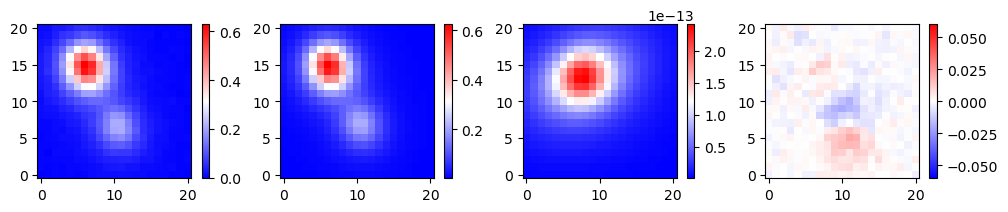

In [17]:
MakePlot1(data_g,I_quasars_g,I_galaxy_g,bkg_g)

In [18]:
# pl.imshow(data_z-I_quasars_z, origin='lower',cmap="bwr")


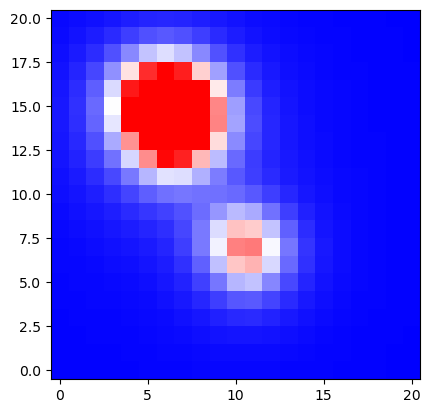

In [19]:
pl.imshow(I_quasars_r, origin='lower',cmap="bwr",vmin=0,vmax=0.6)

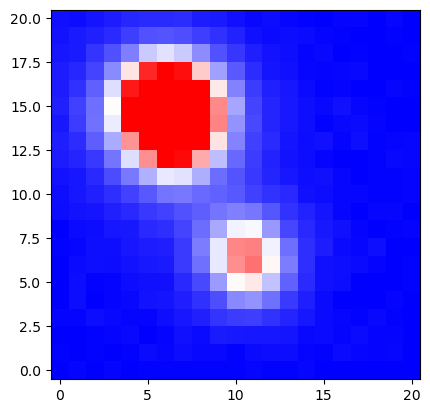

In [20]:
pl.imshow(data_r, origin='lower',cmap="bwr",vmin=0,vmax=0.6)

0.09918320844501848 -0.0861729429727619


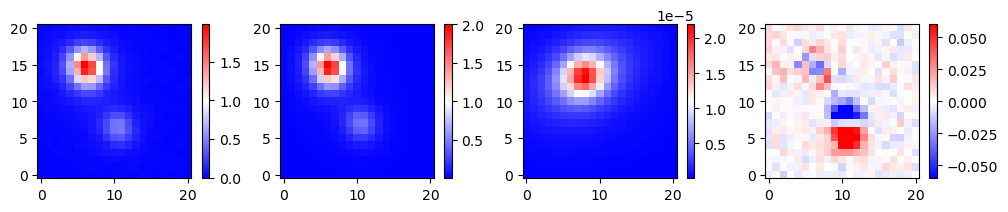

In [21]:
MakePlot1(data_r,I_quasars_r,I_galaxy_r,bkg_r)

In [22]:
I_galaxy_z.max()/(data_z-model_z-np.ones_like(model_z)*0.02).max()

1.9818511217114414

0.05988091372700111 -0.0539651767818192


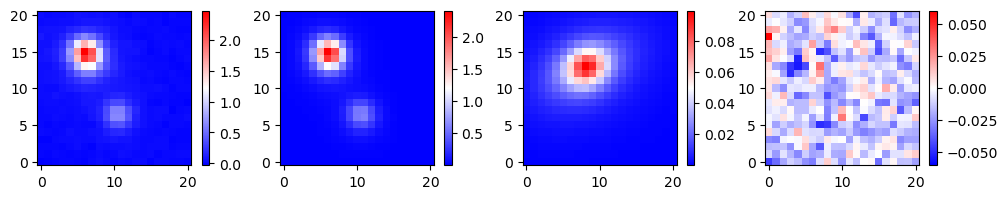

In [23]:
MakePlot1(data_z,I_quasars_z,I_galaxy_z,bkg_z+0.01)

## catalog

In [24]:
def PrintInfo(band,PSF):
    print(band,"-band results:")
    hdul = fits.open('./results/'+obj+'-'+band+'_fit_PSFs_one_sersic.fits')

#     PSF=fits.open("J0746-"+band+"_temp_image.fits")[2].data
    ppar0=(hdul[3].data).p_phot
    I_quasars=lf.phot_model(x, y, ppar0[0:28], ['moffat', 'moffat', 'moffat', 'moffat'], n_phot=4)
    I_galaxy=lf.phot_model(x, y, ppar0[28:-1], ['sersic'], PSF=PSF, n_phot=1)
    print("sersic index:",round(ppar0[34],3)) #sersic index
    print("sersic eff radius:",round(ppar0[31],3)) #sersic eff radius
    print("sersic x:",round(ppar0[29],3)) #sersic x
    print("sersic y:",round(ppar0[30],3)) #sersic y
    print("sersic PA",round(ppar0[32],3)) #sersic  effective radius
    print("sersic Q",round(ppar0[33],3)) #sersic  effective radius
    print("sersic totall flux mag:",round(-2.5*np.log10(I_galaxy.sum())+22.5,3))  #sersic total flux
    print("psf1 x:",round(ppar0[1],3)) #psf1-x
    print("psf1 y:",round(ppar0[2],3)) #psf1-y
    print("psf1 x - gal x:",round(ppar0[1]-ppar0[29],3)) #psf1-x
    print("psf1 y - gal y:",round(ppar0[2]-ppar0[30],3)) #psf1-y
    I_quasars1=lf.phot_model(x, y, ppar0[0:14], ['moffat', 'moffat'], n_phot=2)
    print("psf2 totall flux mag:",round(-2.5*np.log10(I_quasars1.sum())+22.5,3))  #psf1 total flux
    print("psf2 x:",round(ppar0[15],3)) #psf1-x
    print("psf2 y:",round(ppar0[16],3)) #psf1-y
    print("psf2 x - gal x:",round(ppar0[15]-ppar0[29],3)) #psf1-x
    print("psf2 y - gal y:",round(ppar0[16]-ppar0[30],3)) #psf1-y
    I_quasars2=lf.phot_model(x, y, ppar0[14:28], ['moffat', 'moffat'], n_phot=2)
    print("psf2 totall flux mag:",round(-2.5*np.log10(I_quasars2.sum())+22.5,3))  #psf2 total flux

In [25]:
PrintInfo("g",PSF_g)

g -band results:
sersic index: 3.45
sersic eff radius: 3.853
sersic x: -2.051
sersic y: 2.433
sersic PA 117.024
sersic Q 0.513
sersic totall flux mag: 49.355
psf1 x: -3.484
psf1 y: 3.831
psf1 x - gal x: -1.433
psf1 y - gal y: 1.397
psf2 totall flux mag: 19.135
psf2 x: 0.844
psf2 y: -4.059
psf2 x - gal x: 2.895
psf2 y - gal y: -6.492
psf2 totall flux mag: 20.337


In [26]:
PrintInfo("r",PSF_r)

r -band results:
sersic index: 3.451
sersic eff radius: 2.422
sersic x: -2.051
sersic y: 2.433
sersic PA 117.024
sersic Q 0.513
sersic totall flux mag: 30.05
psf1 x: -3.662
psf1 y: 3.627
psf1 x - gal x: -1.611
psf1 y - gal y: 1.194
psf2 totall flux mag: 18.496
psf2 x: 0.635
psf2 y: -4.059
psf2 x - gal x: 2.687
psf2 y - gal y: -6.492
psf2 totall flux mag: 20.104


In [27]:
PrintInfo("z",PSF_z)

z -band results:
sersic index: 3.351
sersic eff radius: 3.422
sersic x: -2.051
sersic y: 2.433
sersic PA 117.024
sersic Q 0.513
sersic totall flux mag: 20.93
psf1 x: -3.997
psf1 y: 4.195
psf1 x - gal x: -1.946
psf1 y - gal y: 1.761
psf2 totall flux mag: 18.559
psf2 x: 0.36
psf2 y: -4.059
psf2 x - gal x: 2.411
psf2 y - gal y: -6.492
psf2 totall flux mag: 19.995


In [28]:
chi2_g,chi2_r,chi2_z

(0.8008784184872586, 1.134501722664278, 1.070018274360545)

In [29]:
ppar_z[28]

5.450751808180766